<a href="https://colab.research.google.com/github/rms5010/first-dl-project/blob/main/dl_project_csv_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# csv 파일 마운트하기

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import pandas as pd

# 파일 경로 설정 (네 드라이브 안의 실제 위치로 바꿔야 함!)
path = '/content/drive/MyDrive/2025-1/dl/deep-learning-project/KR_youtube_trending_data.csv'

# 데이터 불러오기
df = pd.read_csv(path)

# 일부 데이터 확인
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,uq5LClQN3cE,안녕하세요 보겸입니다,2020-08-09T09:32:48Z,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,24,2020-08-12T00:00:00Z,보겸|bokyem,5947503,53326,105756,139946,https://i.ytimg.com/vi/uq5LClQN3cE/default.jpg,False,False,NaN
1,I-ZbZCHsHD0,부락토스의 계획 [총몇명 프리퀄],2020-08-12T09:00:08Z,UCRuSxVu4iqTK5kCh90ntAgA,총몇명,1,2020-08-12T00:00:00Z,총몇명|재밌는 만화|부락토스|루시퍼|총몇명 프리퀄|총몇명 스토리,963384,28244,494,3339,https://i.ytimg.com/vi/I-ZbZCHsHD0/default.jpg,False,False,"오늘도 정말 감사드립니다!!총몇명 스튜디오 - 총몇명, 십제곱, 5G민, MOVE혁..."
2,9d7jNUjBoss,평생 반성하면서 살겠습니다.,2020-08-10T09:54:13Z,UCMVC92EOs9yDJG5JS-CMesQ,양팡 YangPang,22,2020-08-12T00:00:00Z,양팡|양팡유튜브|팡튜브|가족시트콤|양팡가족|양팡가족시트콤|양팡언니|현실남매|현실자매...,2950885,17974,68898,50688,https://i.ytimg.com/vi/9d7jNUjBoss/default.jpg,False,False,NaN
3,3pI_L3-sMVg,안녕하세요 꽈뚜룹입니다.,2020-08-11T15:00:58Z,UCkQCwnkQfgSuPTTnw_Y7v7w,꽈뚜룹 Quaddurup,24,2020-08-12T00:00:00Z,꽈뚜룹|한국여행기|quaddurup|뚜룹이|korea|southkorea|vlog|...,1743374,36893,1798,8751,https://i.ytimg.com/vi/3pI_L3-sMVg/default.jpg,False,False,앞으로 좀 더 깔끔한 영상제작 약속 드리겠습니다.늘 감사드립니다
4,zrsBjYukE8s,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,2020-08-11T09:00:13Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|J.Y.Park|JYPark|박진영|선미|S...,3433885,353337,9763,23405,https://i.ytimg.com/vi/zrsBjYukE8s/default.jpg,False,False,MelOn http://kko.to/TWyXd7zYjSpotify https://s...


# 전체 컬럼 확인

In [27]:
df.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description'],
      dtype='object')

# 데이터 프레임 구조 미리보기

In [28]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265754 entries, 0 to 265753
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           265754 non-null  object
 1   title              265754 non-null  object
 2   publishedAt        265754 non-null  object
 3   channelId          265754 non-null  object
 4   channelTitle       265754 non-null  object
 5   categoryId         265754 non-null  int64 
 6   trending_date      265754 non-null  object
 7   tags               265754 non-null  object
 8   view_count         265754 non-null  int64 
 9   likes              265754 non-null  int64 
 10  dislikes           265754 non-null  int64 
 11  comment_count      265754 non-null  int64 
 12  thumbnail_link     265754 non-null  object
 13  comments_disabled  265754 non-null  bool  
 14  ratings_disabled   265754 non-null  bool  
 15  description        260902 non-null  object
dtypes: bool(2), int64(5)

# 필요한 컬럼만 추리기

In [29]:
df_reduced = df[[
    'title', 'publishedAt', 'trending_date',
    'categoryId', 'view_count', 'likes', 'comment_count', 'tags'
]]

# 컬럼명 바꾸기

In [30]:
df_reduced = df_reduced.rename(columns={
    'view_count': 'views',
    'comment_count': 'comments',
    'categoryId': 'category'
})

# 기초 통계 요약

In [31]:
df_reduced.describe()  # 수치형 컬럼 요약
df_reduced['category'].value_counts()  # 카테고리별 개수

,count
category,
24,90079
22,44516
10,30500
17,20496
23,17049
26,11350
20,11236
25,10267
1,7108


# 빠른 결측치 확인

In [32]:
df_reduced.isnull().sum()

,0
title,0
publishedAt,0
trending_date,0
category,0
views,0
likes,0
comments,0
tags,0


# 원본 데이터와 정리된 데이터 비교

In [33]:
print("📌 원본 데이터셋의 컬럼 수:", df.shape[1])
print("🆕 정리된 데이터셋의 컬럼 수:", df_reduced.shape[1])
print()

print("📌 원본 컬럼 목록:")
print(df.columns.tolist())
print()

print("🆕 정리된 컬럼 목록:")
print(df_reduced.columns.tolist())
print()

# 제거된 컬럼 보기
removed_cols = list(set(df.columns) - set(df_reduced.columns))
print("❌ 제거된 컬럼:")
print(removed_cols)

📌 원본 데이터셋의 컬럼 수: 16
🆕 정리된 데이터셋의 컬럼 수: 8

📌 원본 컬럼 목록:
['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle', 'categoryId', 'trending_date', 'tags', 'view_count', 'likes', 'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'description']

🆕 정리된 컬럼 목록:
['title', 'publishedAt', 'trending_date', 'category', 'views', 'likes', 'comments', 'tags']

❌ 제거된 컬럼:
['channelTitle', 'view_count', 'ratings_disabled', 'comments_disabled', 'categoryId', 'dislikes', 'comment_count', 'description', 'channelId', 'video_id', 'thumbnail_link']


# 시각화 코드: 정리 전/후 컬럼 수 비교 (막대그래프)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52972 (\N{HANGUL SYLLABLE KEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47100 (\N{HANGUL SYLLABLE REOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/us

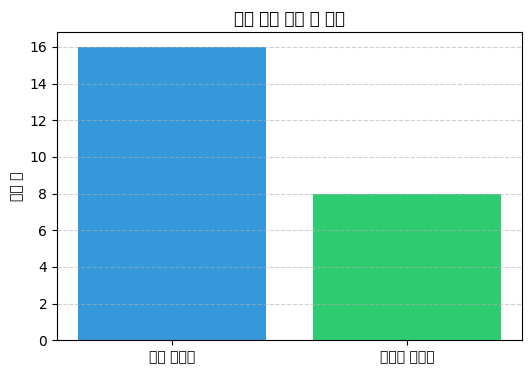

In [34]:
import matplotlib.pyplot as plt

# 컬럼 개수
original_cols = df.shape[1]
reduced_cols = df_reduced.shape[1]

# 시각화
plt.figure(figsize=(6, 4))
plt.bar(['원본 데이터', '정리된 데이터'], [original_cols, reduced_cols], color=['#3498db', '#2ecc71'])
plt.title('정리 전후 컬럼 수 비교')
plt.ylabel('컬럼 수')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# 시각화: 어떤 컬럼이 제거되었는지 리스트로 표시

In [35]:
removed_cols = list(set(df.columns) - set(df_reduced.columns))

print("❌ 정리 과정에서 제거된 컬럼 목록:")
for col in removed_cols:
    print(" -", col)

❌ 정리 과정에서 제거된 컬럼 목록:
 - channelTitle
 - view_count
 - ratings_disabled
 - comments_disabled
 - categoryId
 - dislikes
 - comment_count
 - description
 - channelId
 - video_id
 - thumbnail_link


# 컬럼 이름이 바뀐 경우

In [36]:
# 원래 이름과 바뀐 이름 매칭 확인용
rename_dict = {
    'view_count': 'views',
    'comment_count': 'comments',
    'categoryId': 'category'
}

print("📝 이름이 바뀐 컬럼들:")
for old, new in rename_dict.items():
    print(f" - {old} → {new}")

📝 이름이 바뀐 컬럼들:
 - view_count → views
 - comment_count → comments
 - categoryId → category


# 파생 변수 만들기

In [37]:
# 요일
df_reduced['publishedAt'] = pd.to_datetime(df_reduced['publishedAt'])
df_reduced['upload_day'] = df_reduced['publishedAt'].dt.day_name()

# 제목 길이
df_reduced['title_length'] = df_reduced['title'].apply(len)

# 태그 개수
df_reduced['tag_count'] = df_reduced['tags'].apply(lambda x: len(x.split('|')) if isinstance(x, str) else 0)

# 간단한 시각화

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50689 (\N{HANGUL SYLLABLE YEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/u

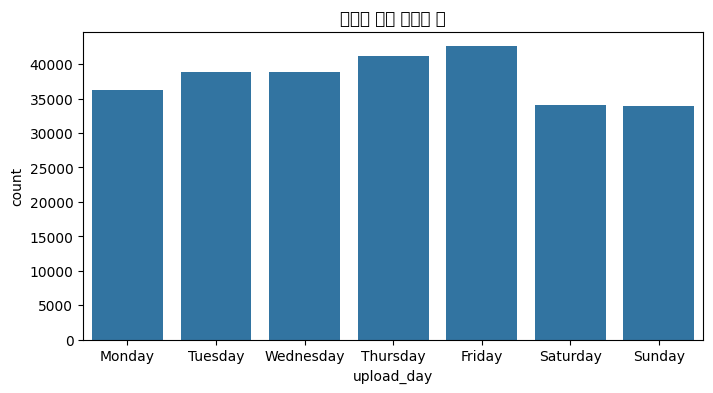

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# 요일별 업로드 빈도
plt.figure(figsize=(8, 4))
sns.countplot(data=df_reduced, x='upload_day', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("요일별 영상 업로드 수")
plt.show()

# 간단한 통계 정리

In [39]:
df_reduced[['views', 'likes', 'comments', 'tag_count', 'title_length']].describe()

,views,likes,comments,tag_count,title_length
count,2.657540e+05,2.657540e+05,2.657540e+05,265754.000000,265754.000000
mean,1.824430e+06,7.447897e+04,7.241786e+03,20.340112,44.509599
std,7.139992e+06,4.133536e+05,8.861773e+04,20.074858,23.226576
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.000000
25%,3.499178e+05,5.928000e+03,5.070000e+02,6.000000,27.000000
50%,6.644375e+05,1.170900e+04,1.107500e+03,14.000000,41.000000
75%,1.328553e+06,2.729400e+04,2.559000e+03,29.000000,59.000000
max,2.963142e+08,1.646425e+07,6.939302e+06,144.000000,100.000000


# 카테고리 이름 붙이기

In [40]:
category_map = {
    1: "Film & Animation", 2: "Autos & Vehicles", 10: "Music",
    15: "Pets & Animals", 17: "Sports", 20: "Gaming",
    22: "People & Blogs", 23: "Comedy", 24: "Entertainment",
    25: "News & Politics", 26: "Howto & Style", 27: "Education",
    28: "Science & Technology"
}

df_reduced['category_name'] = df_reduced['category'].map(category_map)

# 카테고리별 평균 조회수 시각화 (ID vs 이름)

<ipython-input-41-b7b5df96147a>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_reduced, x='category', y='views', estimator='mean', palette='Blues_d')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Gly

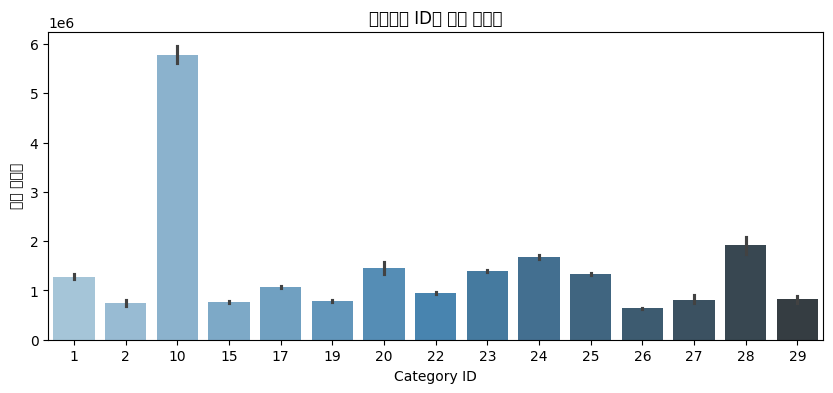

<ipython-input-41-b7b5df96147a>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_reduced, x='category_name', y='views', estimator='mean', palette='Greens_d')
<ipython-input-41-b7b5df96147a>:30: UserWarning: Glyph 52852 (\N{HANGUL SYLLABLE KA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-41-b7b5df96147a>:30: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-41-b7b5df96147a>:30: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-41-b7b5df96147a>:30: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-41-b7b5df96147a>:30: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu 

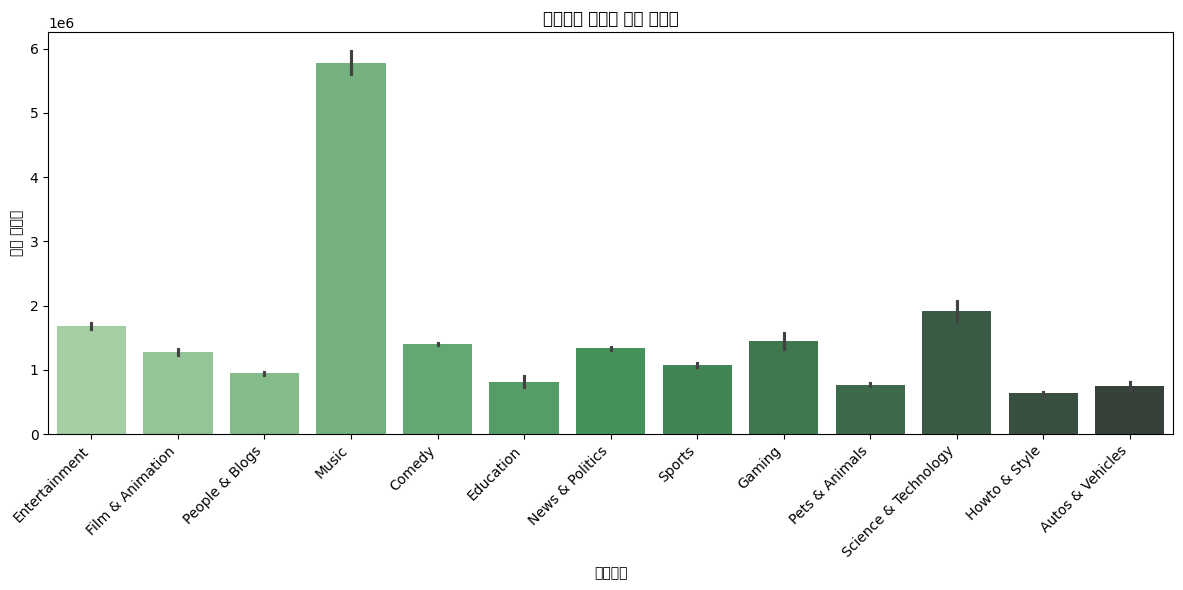

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# 먼저 카테고리 이름 붙이기
category_map = {
    1: "Film & Animation", 2: "Autos & Vehicles", 10: "Music",
    15: "Pets & Animals", 17: "Sports", 20: "Gaming",
    22: "People & Blogs", 23: "Comedy", 24: "Entertainment",
    25: "News & Politics", 26: "Howto & Style", 27: "Education",
    28: "Science & Technology"
}

df_reduced['category_name'] = df_reduced['category'].map(category_map)

# 📊 1. 숫자 ID로 보는 평균 조회수
plt.figure(figsize=(10, 4))
sns.barplot(data=df_reduced, x='category', y='views', estimator='mean', palette='Blues_d')
plt.title('카테고리 ID별 평균 조회수')
plt.xlabel('Category ID')
plt.ylabel('평균 조회수')
plt.show()

# 📊 2. 이름으로 보는 평균 조회수
plt.figure(figsize=(12, 6))
sns.barplot(data=df_reduced, x='category_name', y='views', estimator='mean', palette='Greens_d')
plt.title('카테고리 이름별 평균 조회수')
plt.xlabel('카테고리')
plt.ylabel('평균 조회수')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()